In [1]:
import numpy as np 
import pandas as pd 
import string 
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAMRATA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NAMRATA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
data=pd.read_csv('C:/Users/NAMRATA/Downloads/DATA SCIENCE/ASSIGNMENT/Text mining/Elon_musk.csv', encoding='cp1252')
data

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


No.of words

In [3]:
#Number of Words in single tweet
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 I’m an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


Number of Characters

In [4]:
#Number of characters in single tweet including spaces
data['char_count'] = data['Text'].str.len() 
data[['Text','char_count']].head()

,Text,char_count
0,@kunalb11 I’m an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


Number of stopwords

In [5]:
stop = stopwords.words('english')

data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords']].head()

,Text,stopwords
0,@kunalb11 I’m an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


In [6]:
# Total no.of stopwords in given dataset

In [7]:
data['stopwords'].sum()

5104

Number of special characters (@)

In [9]:
data['hastags'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 I’m an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


Data Pre-Processing

Converting to lower case

In [10]:
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()

0                               @kunalb11 i’m an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

Removing Punctuation and Special Characters

In [11]:
data['Text'] = data['Text'].str.replace('[^\w\s]','')
data['Text'].head()

0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

Removing of Stop Words

In [12]:
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

Tokenization

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NAMRATA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
tweets=np.array(data['Text'])
s=str(tweets)
s

"['kunalb11 im alien'\n 'id_aa_carmack ray tracing cyberpunk hdr nextlevel tried'\n 'joerogan spotify great interview' ...\n 'teslagong ppathole samwise gamgee'\n 'ppathole altho dumb dumber u0001f525u0001f525'\n 'progress update august 28']"

In [15]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(s)
print(text_tokens)

['[', "'kunalb11", 'im', "alien'", "'id_aa_carmack", 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', "tried'", "'joerogan", 'spotify', 'great', 'interview', "'", '...', "'teslagong", 'ppathole', 'samwise', "gamgee'", "'ppathole", 'altho', 'dumb', 'dumber', "u0001f525u0001f525'", "'progress", 'update', 'august', '28', "'", ']']


Stemming

In [16]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                     joerogan spotifi great interview
3                              gtera27 doge underestim
4    teslacn congratul tesla china amaz execut last...
Name: Text, dtype: object

Lemmatization

In [17]:
data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulation tesla china amazing exe...
Name: Text, dtype: object

Sentiment Polarity

In [18]:
data['sentiment_polarity'] = data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity )
data[['Text','sentiment_polarity']].head()

,Text,sentiment_polarity
0,kunalb11 im alien,-0.25
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.00
2,joerogan spotify great interview,0.80
3,gtera27 doge underestimated,0.00
4,teslacn congratulation tesla china amazing exe...,0.20


In [19]:
# No.of Negative,Positive and Neutral Tweets in our given data

In [20]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

Sentiment

In [21]:
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [22]:
data['Subjectivity'] = data['Text'].apply(getSubjectivity)
data['Polarity'] = data['Text'].apply(getPolarity)

In [23]:
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

data ['sentiment'] = data['sentiment_polarity'].apply(getAnalysis )
data[['Text','sentiment','sentiment_polarity']]

,Text,sentiment,sentiment_polarity
0,kunalb11 im alien,Negative,-0.250000
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,Neutral,0.000000
2,joerogan spotify great interview,Positive,0.800000
3,gtera27 doge underestimated,Neutral,0.000000
4,teslacn congratulation tesla china amazing exe...,Positive,0.200000
...,...,...,...
1994,flcnhvy true sound surreal negative propaganda...,Positive,0.152381
1995,ppathole make sure read ur term amp condition ...,Positive,0.500000
1996,teslagong ppathole samwise gamgee,Neutral,0.000000
1997,ppathole altho dumb dumber u0001f525u0001f525,Negative,-0.375000


In [24]:
count=data['sentiment'].value_counts()
count

Neutral     956
Positive    845
Negative    198
Name: sentiment, dtype: int64

In [29]:
data

,Unnamed: 0,Text,word_count,char_count,stopwords,hastags,sentiment_polarity,Subjectivity,Polarity,sentiment
0,1,kunalb11 im alien,4,22,1,1,-0.250000,0.750000,-0.250000,Negative
1,2,id_aa_carmack ray tracing cyberpunk hdr nextle...,13,82,4,1,0.000000,0.000000,0.000000,Neutral
2,3,joerogan spotify great interview,4,35,0,2,0.800000,0.750000,0.800000,Positive
3,4,gtera27 doge underestimated,4,31,1,1,0.000000,0.000000,0.000000,Neutral
4,5,teslacn congratulation tesla china amazing exe...,17,104,5,1,0.200000,0.322222,0.200000,Positive
...,...,...,...,...,...,...,...,...,...,...
1994,1995,flcnhvy true sound surreal negative propaganda...,23,144,10,1,0.152381,0.492857,0.152381,Positive
1995,1996,ppathole make sure read ur term amp condition ...,12,77,2,1,0.500000,0.888889,0.500000,Positive
1996,1997,teslagong ppathole samwise gamgee,4,35,0,2,0.000000,0.000000,0.000000,Neutral
1997,1998,ppathole altho dumb dumber u0001f525u0001f525,7,59,2,1,-0.375000,0.500000,-0.375000,Negative


<BarContainer object of 3 artists>

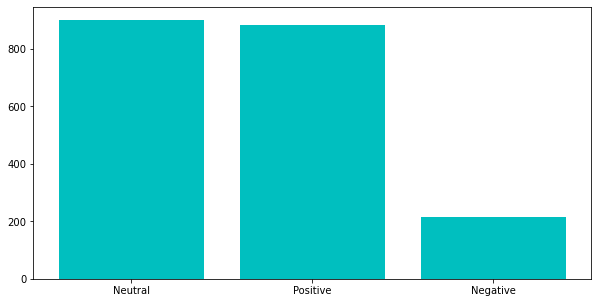

In [25]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,5))
count=[901,884,214]
senti=['Neutral','Positive','Negative']
plt.bar(senti,count,color='c')

In [26]:
# Joining the list into one string/text
text = ' '.join(data)
text

'Unnamed: 0 Text word_count char_count stopwords hastags sentiment_polarity Subjectivity Polarity sentiment'

In [27]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

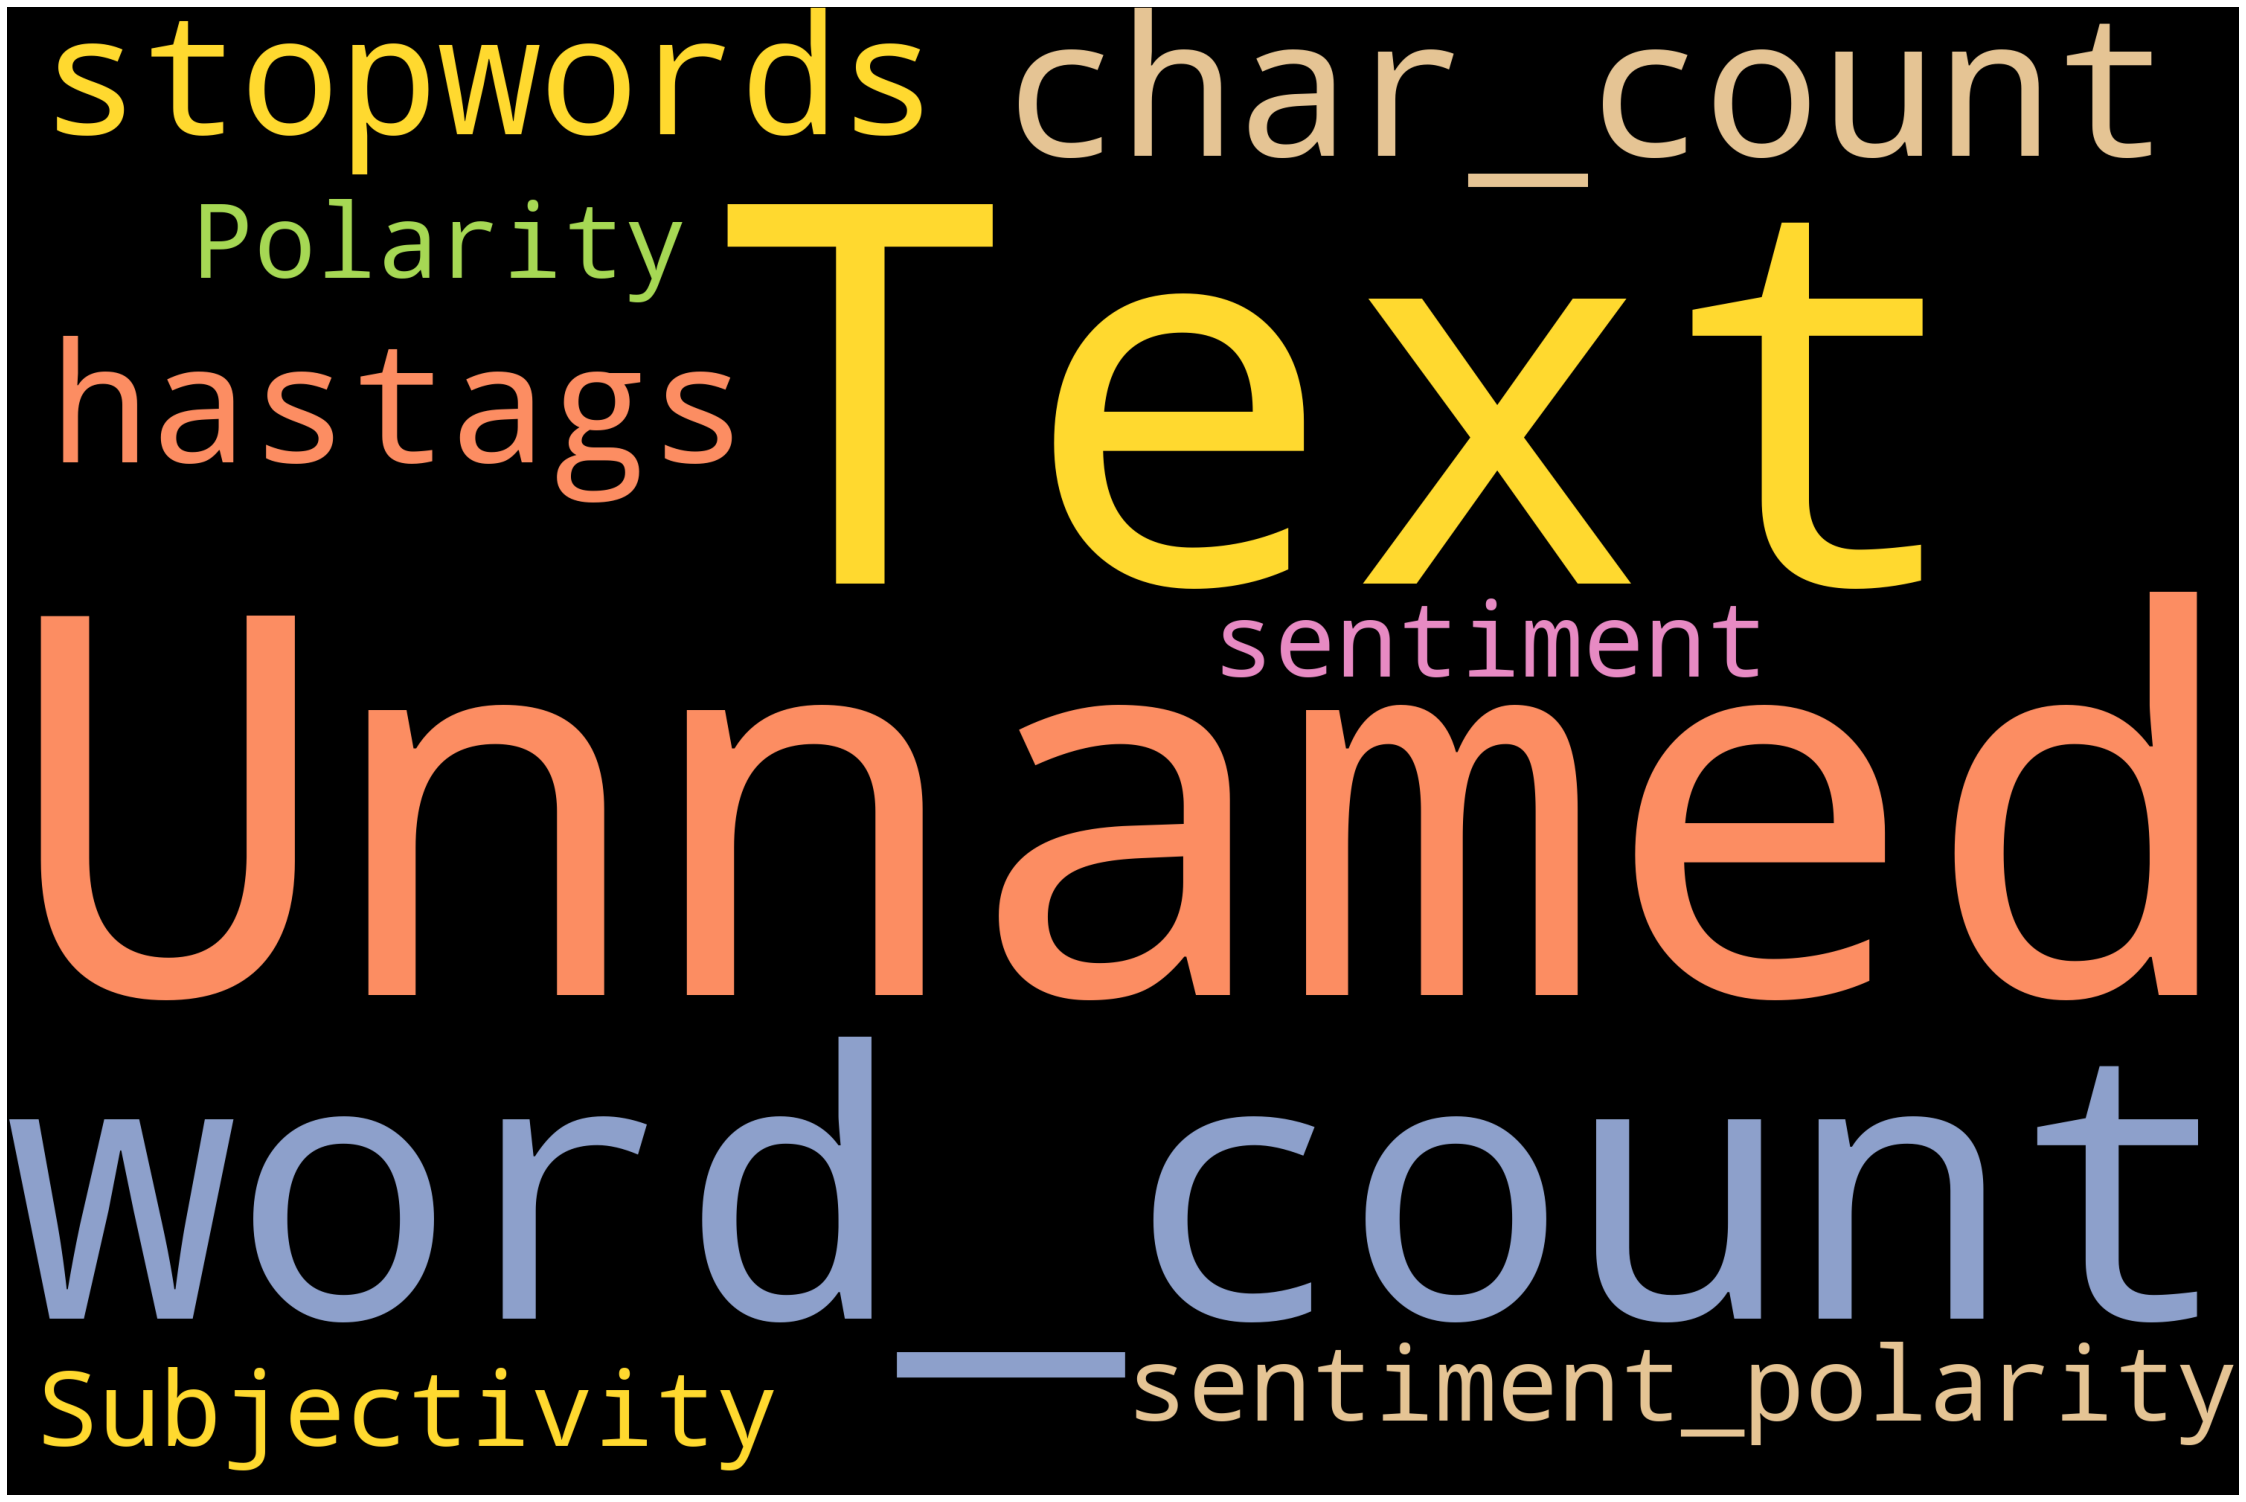

In [28]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)